In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filenames = ['/content/drive/MyDrive/Colab Notebooks/DATA606/gl2010_19/GL2010.TXT', 
             '/content/drive/MyDrive/Colab Notebooks/DATA606/gl2010_19/GL2011.TXT', 
             '/content/drive/MyDrive/Colab Notebooks/DATA606/gl2010_19/GL2012.TXT', 
             '/content/drive/MyDrive/Colab Notebooks/DATA606/gl2010_19/GL2013.TXT', 
             '/content/drive/MyDrive/Colab Notebooks/DATA606/gl2010_19/GL2014.TXT', 
             '/content/drive/MyDrive/Colab Notebooks/DATA606/gl2010_19/GL2015.TXT', 
             '/content/drive/MyDrive/Colab Notebooks/DATA606/gl2010_19/GL2016.TXT',
             '/content/drive/MyDrive/Colab Notebooks/DATA606/gl2010_19/GL2017.TXT', 
             '/content/drive/MyDrive/Colab Notebooks/DATA606/gl2010_19/GL2018.TXT', 
             '/content/drive/MyDrive/Colab Notebooks/DATA606/gl2010_19/GL2019.TXT']

with open('/content/drive/MyDrive/Colab Notebooks/DATA606/gl2010_19/GLall.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

In [3]:
GL_cols = ['date', 'numberofgame', 'dayofweek','visitingteam', 'visitingleague', 'visitingteamgamenumber',
            'hometeam', 'homeleague', 'hometeamgamenumber', 'visitingscore', 'homescore',
            'totalouts', 'dayornight', 'completion', 'forfeit', 'protest', 'parkID', 'attendance',
            'totalminutes', 'visitinglinescore', 'homelinescore', 'V_atbats', 'V_hits',
            'V_doubles', 'V_triples', 'V_homeruns', 'V_rbi', 'V_sacrificehits', 'V_sacflies', 'V_hitbypitch',
            'V_walks', 'V_intentionalwalks', 'V_strikeouts', 'V_stolenbases', 'V_caughtstealing',
            'V_groundedintodoubleplay', 'V_catcherinterference', 'V_leftonbase', 'V_pitchersused',
            'V_individualearnedruns', 'V_teamearnedruns', 'V_wildpitches', 'V_putouts', 'V_balks', 'V_assists', 'V_errors',
            'V_passedballs', 'V_doubleplays', 'V_tripleplays', 'H_atbats', 'H_hits', 'H_doubles',
            'H_triples','H_homeruns', 'H_rbi', 'H_sacrificehits', 'H_sacflies', 'H_hitbypitch',
            'H_walks', 'H_intentionalwalks', 'H_strikeouts', 'H_stolenbases', 'H_caughtstealing',
            'H_groundedintodoubleplay', 'H_catcherinterference', 'H_leftonbase', 'H_pitchersused',
            'H_individualearnedruns', 'H_teamearnedruns', 'H_wildpitches', 'H_putouts', 'H_balks', 'H_assists', 'H_errors',
            'H_passedballs', 'H_doubleplays', 'H_tripleplays','homeumipreID', 'homeumiprename', '1BumpireID', '1Bumpirename', 
            '2BumpireID', '2Bumpirename', '3BumipreID', '3Bumpirename', 'LFumpireID', 'LFumpirename',
            'RFumpireID', 'RFumpirename', 'V_managerID', 'V_managername', 'H_managerID', 'H_managername', 'win_pitcherID',
            'win_pitchername', 'lose_pitcherID', 'lose_pitchername', 'save_pitcherID', 'save_pitchername',
            'gamewin_rbi_ID', 'gamewin_rbi_name', 'V_pitcherID', 'V_pitchername', 'H_pitcherID',
            'H_pitchername', 'V_player1_id', 'V_player1_name', 'V_player1_pos', 'V_player2_id',
            'V_player2_name', 'V_player2_pos', 'V_player3_id', 'V_player3_name', 'V_player3_pos',
            'V_player4_id', 'V_player4_name', 'V_player4_pos', 'V_player5_id', 'V_player5_name',
            'V_player5_pos', 'V_player6_id', 'V_player6_name', 'V_player6_pos', 'V_player7_id',
            'V_player7_name', 'V_player7_pos', 'V_player8_id', 'V_player8_name', 'V_player8_pos',
            'V_player9_id', 'V_player9_name', 'V_player9_pos', 'H_player1_id','H_player1_name', 
            'H_player1_pos', 'H_player2_id', 'H_player2_name', 'H_player2_pos', 'H_player3_id', 
            'H_player3_name', 'H_player3_pos','H_player4_id', 'H_player4_name', 'H_player4_pos', 
            'H_player5_id', 'H_player5_name', 'H_player5_pos', 'H_player6_id', 'H_player6_name', 
            'H_player6_pos', 'H_player7_id','H_player7_name', 'H_player7_pos', 'H_player8_id', 
            'H_player8_name', 'H_player8_pos','H_player9_id', 'H_player9_name', 'H_player9_pos',
            'additionalinfo', 'acquistioninfo']

In [4]:
# load game logs for 2010
GLall = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA606/gl2010_19/GLall.txt', sep = ',', header = None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,85,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
GLall.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160
0,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,9,51,N,NaN,NaN,NaN,BOS07,37440.0,226,020300200,01001331x,37,12,2,0,2,6,0,0,0,6,0,2,2,0,2,0,9,5,8,...,Jorge Posada,2,granc001,Curtis Granderson,8,swisn001,Nick Swisher,9,gardb001,Brett Gardner,7,ellsj001,Jacoby Ellsbury,7,pedrd001,Dustin Pedroia,4,martv001,Victor Martinez,2,youkk001,Kevin Youkilis,3,ortid001,David Ortiz,10,belta001,Adrian Beltre,5,drewj001,J.D. Drew,9,camem001,Mike Cameron,8,scutm001,Marco Scutaro,6,NaN,Y
1,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,6,51,N,NaN,NaN,NaN,ANA01,43504.0,180,020010000,21001002x,32,7,1,0,1,3,0,1,1,3,0,8,1,0,1,0,7,4,6,...,Jason Kubel,10,yound003,Delmon Young,7,hardj003,J.J. Hardy,6,puntn001,Nick Punto,5,aybae001,Erick Aybar,6,abreb001,Bobby Abreu,9,huntt001,Torii Hunter,8,matsh001,Hideki Matsui,10,morak001,Kendrys Morales,3,rivej001,Juan Rivera,7,kendh001,Howie Kendrick,4,woodb003,Brandon Wood,5,mathj001,Jeff Mathis,2,NaN,Y
2,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,6,51,D,NaN,NaN,NaN,CHI12,38935.0,144,000000000,20201001x,30,4,0,0,0,0,0,0,0,1,0,7,0,0,1,0,4,4,6,...,Matt LaPorta,3,grudm001,Mark Grudzielanek,4,marsl001,Lou Marson,2,branm003,Michael Brantley,7,pierj002,Juan Pierre,7,beckg001,Gordon Beckham,4,quenc001,Carlos Quentin,9,konep001,Paul Konerko,3,kotsm001,Mark Kotsay,10,riosa002,Alex Rios,8,piera001,A.J. Pierzynski,2,teahm001,Mark Teahen,5,ramia003,Alexei Ramirez,6,NaN,Y
3,20100405,0,Mon,DET,AL,1,KCA,AL,1,8,4,54,D,NaN,NaN,NaN,KAN06,40052.0,185,100001600,020020000,39,12,4,0,0,7,0,0,0,2,0,9,0,0,1,0,6,5,4,...,Brandon Inge,5,lairg001,Gerald Laird,2,sizes001,Scott Sizemore,4,evera001,Adam Everett,6,dejed001,David DeJesus,9,podss001,Scott Podsednik,7,butlb003,Billy Butler,3,ankir001,Rick Ankiel,8,guilj001,Jose Guillen,10,bloow001,Willie Bloomquist,5,betay001,Yuniesky Betancourt,6,kendj001,Jason Kendall,2,getzc001,Chris Getz,4,NaN,Y
4,20100405,0,Mon,SEA,AL,1,OAK,AL,1,5,3,54,N,NaN,NaN,NaN,OAK01,30686.0,167,111000002,000001200,31,6,2,0,1,5,0,1,0,8,1,8,3,2,1,0,8,4,3,...,Jose Lopez,5,gutif001,Franklin Gutierrez,8,johnr009,Rob Johnson,2,wilsj002,Jack Wilson,6,davir003,Rajai Davis,8,bartd001,Daric Barton,3,sweer001,Ryan Sweeney,9,kouzk001,Kevin Kouzmanoff,5,suzuk001,Kurt Suzuki,2,chave001,Eric Chavez,10,ellim001,Mark Ellis,4,buckt001,Travis Buck,7,pennc001,Cliff Pennington,6,NaN,Y


In [6]:
GLall.columns = GL_cols

In [7]:
GLall.head()

,date,numberofgame,dayofweek,visitingteam,visitingleague,visitingteamgamenumber,hometeam,homeleague,hometeamgamenumber,visitingscore,homescore,totalouts,dayornight,completion,forfeit,protest,parkID,attendance,totalminutes,visitinglinescore,homelinescore,V_atbats,V_hits,V_doubles,V_triples,V_homeruns,V_rbi,V_sacrificehits,V_sacflies,V_hitbypitch,V_walks,V_intentionalwalks,V_strikeouts,V_stolenbases,V_caughtstealing,V_groundedintodoubleplay,V_catcherinterference,V_leftonbase,V_pitchersused,V_individualearnedruns,...,V_player6_name,V_player6_pos,V_player7_id,V_player7_name,V_player7_pos,V_player8_id,V_player8_name,V_player8_pos,V_player9_id,V_player9_name,V_player9_pos,H_player1_id,H_player1_name,H_player1_pos,H_player2_id,H_player2_name,H_player2_pos,H_player3_id,H_player3_name,H_player3_pos,H_player4_id,H_player4_name,H_player4_pos,H_player5_id,H_player5_name,H_player5_pos,H_player6_id,H_player6_name,H_player6_pos,H_player7_id,H_player7_name,H_player7_pos,H_player8_id,H_player8_name,H_player8_pos,H_player9_id,H_player9_name,H_player9_pos,additionalinfo,acquistioninfo
0,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,9,51,N,NaN,NaN,NaN,BOS07,37440.0,226,020300200,01001331x,37,12,2,0,2,6,0,0,0,6,0,2,2,0,2,0,9,5,8,...,Jorge Posada,2,granc001,Curtis Granderson,8,swisn001,Nick Swisher,9,gardb001,Brett Gardner,7,ellsj001,Jacoby Ellsbury,7,pedrd001,Dustin Pedroia,4,martv001,Victor Martinez,2,youkk001,Kevin Youkilis,3,ortid001,David Ortiz,10,belta001,Adrian Beltre,5,drewj001,J.D. Drew,9,camem001,Mike Cameron,8,scutm001,Marco Scutaro,6,NaN,Y
1,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,6,51,N,NaN,NaN,NaN,ANA01,43504.0,180,020010000,21001002x,32,7,1,0,1,3,0,1,1,3,0,8,1,0,1,0,7,4,6,...,Jason Kubel,10,yound003,Delmon Young,7,hardj003,J.J. Hardy,6,puntn001,Nick Punto,5,aybae001,Erick Aybar,6,abreb001,Bobby Abreu,9,huntt001,Torii Hunter,8,matsh001,Hideki Matsui,10,morak001,Kendrys Morales,3,rivej001,Juan Rivera,7,kendh001,Howie Kendrick,4,woodb003,Brandon Wood,5,mathj001,Jeff Mathis,2,NaN,Y
2,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,6,51,D,NaN,NaN,NaN,CHI12,38935.0,144,000000000,20201001x,30,4,0,0,0,0,0,0,0,1,0,7,0,0,1,0,4,4,6,...,Matt LaPorta,3,grudm001,Mark Grudzielanek,4,marsl001,Lou Marson,2,branm003,Michael Brantley,7,pierj002,Juan Pierre,7,beckg001,Gordon Beckham,4,quenc001,Carlos Quentin,9,konep001,Paul Konerko,3,kotsm001,Mark Kotsay,10,riosa002,Alex Rios,8,piera001,A.J. Pierzynski,2,teahm001,Mark Teahen,5,ramia003,Alexei Ramirez,6,NaN,Y
3,20100405,0,Mon,DET,AL,1,KCA,AL,1,8,4,54,D,NaN,NaN,NaN,KAN06,40052.0,185,100001600,020020000,39,12,4,0,0,7,0,0,0,2,0,9,0,0,1,0,6,5,4,...,Brandon Inge,5,lairg001,Gerald Laird,2,sizes001,Scott Sizemore,4,evera001,Adam Everett,6,dejed001,David DeJesus,9,podss001,Scott Podsednik,7,butlb003,Billy Butler,3,ankir001,Rick Ankiel,8,guilj001,Jose Guillen,10,bloow001,Willie Bloomquist,5,betay001,Yuniesky Betancourt,6,kendj001,Jason Kendall,2,getzc001,Chris Getz,4,NaN,Y
4,20100405,0,Mon,SEA,AL,1,OAK,AL,1,5,3,54,N,NaN,NaN,NaN,OAK01,30686.0,167,111000002,000001200,31,6,2,0,1,5,0,1,0,8,1,8,3,2,1,0,8,4,3,...,Jose Lopez,5,gutif001,Franklin Gutierrez,8,johnr009,Rob Johnson,2,wilsj002,Jack Wilson,6,davir003,Rajai Davis,8,bartd001,Daric Barton,3,sweer001,Ryan Sweeney,9,kouzk001,Kevin Kouzmanoff,5,suzuk001,Kurt Suzuki,2,chave001,Eric Chavez,10,ellim001,Mark Ellis,4,buckt001,Travis Buck,7,pennc001,Cliff Pennington,6,NaN,Y


In [8]:
GLall.shape

(24297, 161)

### The GLall dataframe is a super table with all of the game info, but is missing some components - lets add the necessary info. and then break the super table into smaller data frames for analysis

In [9]:
mlb_game_df = GLall.copy()

In [10]:
mlb_game_df.forfeit.unique()

array([nan])

> There were no forfeit games

In [11]:
mlb_game_df2 = mlb_game_df[pd.isnull(
    mlb_game_df['completion'])]

In [12]:
len(mlb_game_df) - len(mlb_game_df2)

21

> There were 21 games that were completed later. The second data frame will only include the games with completion (excludes the 21 null completion games).

### Parse date time into new columns

In [13]:
mlb_game_df2['Y'] = mlb_game_df2['date'].apply(lambda x: str(x)[0:4])
mlb_game_df2['M'] = mlb_game_df2['date'].apply(lambda x: str(x)[4:6])
mlb_game_df2['D'] = mlb_game_df2['date'].apply(lambda x: str(x)[6:8])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### We have the line scores and final scores for home/away teams but we do not have a column which indicates who the winner is. So let's create the column, 'Winner'

In [14]:
mlb_game_df2['scoreDiff'] = mlb_game_df2['homescore'] - mlb_game_df2['visitingscore']

mlb_game_df2['homewin'] = mlb_game_df2['scoreDiff'].apply(
lambda x: 1 if x > 0 else 0)

mlb_game_df2 = mlb_game_df2.reset_index(drop = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
mlb_game_df2['homewin'].mean()

0.5353435491843797

In [16]:
clean_cols = ['Y', 'M', 'D',
              'visitingteam',
              'hometeam',
              'visitingscore',
              'homescore',
              'V_hits',
              'H_hits',
              'homewin',
              'V_errors',
              'H_errors']

In [17]:
mlb_clean = mlb_game_df2[clean_cols]
mlb_clean.head()

,Y,M,D,visitingteam,hometeam,visitingscore,homescore,V_hits,H_hits,homewin,V_errors,H_errors
0,2010,04,04,NYA,BOS,7,9,12,12,1,1,0
1,2010,04,05,MIN,ANA,3,6,7,9,1,0,0
2,2010,04,05,CLE,CHA,0,6,4,6,1,0,0
3,2010,04,05,DET,KCA,8,4,12,9,0,1,1
4,2010,04,05,SEA,OAK,5,3,6,5,0,1,4


In [18]:
mlb_clean.to_excel("mlb_clean_data.xlsx")

### Specify game level data columns

In [19]:
team_cols = [
    'date',
    'Y',
    'M',
    'D',
    'visitingteam',
    'hometeam',
    'visitingscore',
    'homescore',
    'V_pitcherID',
    'H_pitcherID'
]

#for i in range(9):
#    team_cols.append('V_player' + str(i + 1) + '_id')

#for i in range(9):
#    team_cols.append('H_player' + str(i + 1) + '_id')

team_cols.append('homewin')

### Convert date column 

In [20]:
import datetime as dt

In [21]:
mlb_game_df2['date'] = None
for i in range(len(mlb_game_df2)):
    mlb_game_df2.loc[i, 'date'] = dt.date(int(mlb_game_df2.loc[i, 'Y']), 
                                          int(mlb_game_df2.loc[i, 'M']), 
                                          int(mlb_game_df2.loc[i, 'D']))
    if (i % 10000 == 0):
        print(mlb_game_df2.loc[i, 'date'])
mlb_game_df2['date']

2010-04-04
2014-04-21
2018-05-12


0        2010-04-04
1        2010-04-05
2        2010-04-05
3        2010-04-05
4        2010-04-05
            ...    
24271    2019-09-29
24272    2019-09-29
24273    2019-09-29
24274    2019-09-29
24275    2019-09-29
Name: date, Length: 24276, dtype: object

### Add the specified game level columns and the converted date column into a final data frame

In [22]:
team_level_df = mlb_game_df2[team_cols]
team_level_df.head()

,date,Y,M,D,visitingteam,hometeam,visitingscore,homescore,V_pitcherID,H_pitcherID,homewin
0,2010-04-04,2010,04,04,NYA,BOS,7,9,sabac001,beckj002,1
1,2010-04-05,2010,04,05,MIN,ANA,3,6,bakes002,weavj003,1
2,2010-04-05,2010,04,05,CLE,CHA,0,6,westj001,buehm001,1
3,2010-04-05,2010,04,05,DET,KCA,8,4,verlj001,greiz001,0
4,2010-04-05,2010,04,05,SEA,OAK,5,3,hernf002,sheeb001,0


In [23]:
print(list(team_level_df))

['date', 'Y', 'M', 'D', 'visitingteam', 'hometeam', 'visitingscore', 'homescore', 'V_pitcherID', 'H_pitcherID', 'homewin']


### Check if there are any duplicate teams

In [24]:
def remove_duplicate_teams(tm):
    if (tm == 'FLO'):
        return 'MIA'
    if (tm == 'MON'):
        return 'WAS'
    return tm

team_level_df['hometeam'] = team_level_df[
    'hometeam'].apply(remove_duplicate_teams)

team_level_df['visitingteam'] = team_level_df[
    'visitingteam'].apply(remove_duplicate_teams)

print(team_level_df['hometeam'].nunique())
print(team_level_df['visitingteam'].nunique())

30
30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


### After a winner column, we should also make a column to differentiate if the winner was a home or visitor team

In [25]:
visitorWin = pd.DataFrame(team_level_df[team_level_df.homewin == 0].rename({'visitingteam': 'team'}, 
            axis = 1).groupby(['Y', 'team'])['homewin'].count()).rename({'winner': 'W'}, axis = 1)

homeWin = pd.DataFrame(team_level_df.rename({'hometeam': 'team'}, 
          axis = 1).groupby(['Y', 'team'])['homewin'].sum()).rename({'winner': 'W'}, axis = 1)

totalWin = visitorWin + homeWin

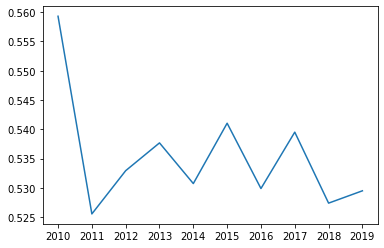

In [26]:
home_WR = team_level_df.groupby('Y').homewin.mean()
plt.plot(home_WR)

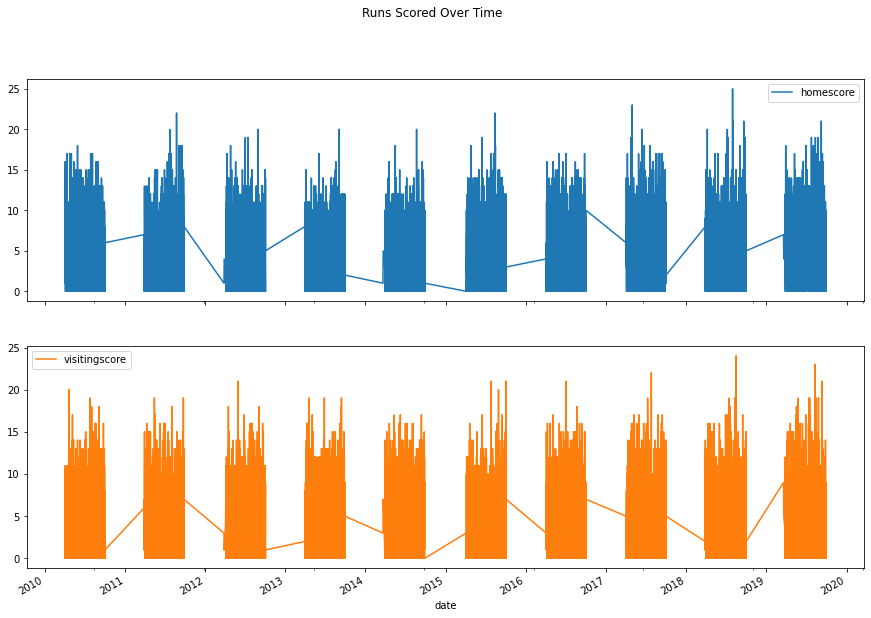

In [27]:
df_plot = team_level_df[['homescore', 'visitingscore','date','hometeam']].set_index('date')

plot = df_plot.plot(subplots=True,title = 'Runs Scored Over Time',figsize=(15,10))

In [37]:
data = pd.read_excel('mlb_clean_data-2.xlsx')

In [38]:
data.head()

,Unnamed: 0,Y,M,D,visitingteam,hometeam,visitingscore,homescore,V_hits,H_hits,homewin,V_errors,H_errors,Average H_score,Average V_score,Avg H_score conceded,Avg V_score conceded,H_score Running Avg,V_score Running Avg,H_score conceded RA,V_score conceded RA,AvgHscoreRA,AvgVscoreRA,AvgHscoreConcededRA,AvgVscoreConcededRA
0,0,2010,4,4,NYA,BOS,7,9,12,12,1,1,0,9.0,7.0,7.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2010,4,5,MIN,ANA,3,6,7,9,1,0,0,6.0,3.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2010,4,5,CLE,CHA,0,6,4,6,1,0,0,6.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2010,4,5,DET,KCA,8,4,12,9,0,1,1,4.0,8.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2010,4,5,SEA,OAK,5,3,6,5,0,1,4,3.0,5.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
Average_cols = ['homewin',
                'AvgHscoreRA',
                'AvgVscoreRA',
                'AvgHscoreConcededRA',
                'AvgVscoreConcededRA']

In [40]:
mlb_data = data[Average_cols]
mlb_data.head()

,homewin,AvgHscoreRA,AvgVscoreRA,AvgHscoreConcededRA,AvgVscoreConcededRA
0,1,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0


In [42]:
n_games = mlb_data.shape[0]
n_features = mlb_data.shape[1] -1 
n_homewins = len(mlb_data[mlb_data.homewin == 1])
win_rate = (float(n_homewins)/(n_games)) * 100

print("Total games:", n_games)
print("Number of features:", n_features)
print("Number of home wins:", n_homewins)
print("Home team win rate:", win_rate, "%")

Total games: 24276
Number of features: 4
Number of home wins: 12996
Home team win rate: 53.53435491843796 %


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f375b507690>,
      dtype=object)

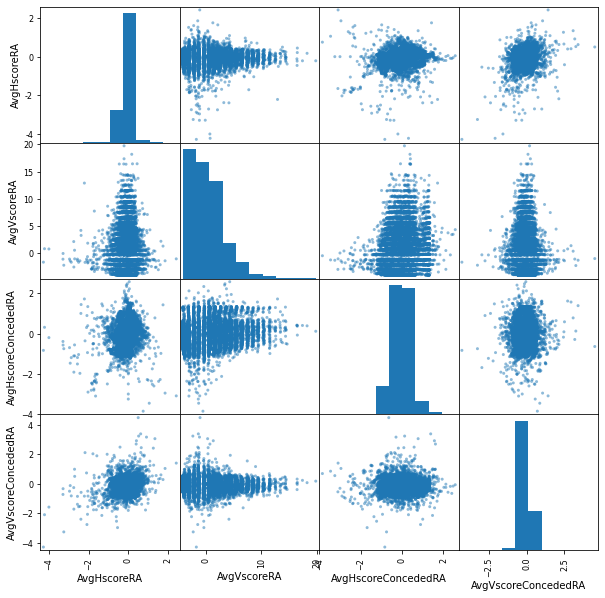

In [44]:
from pandas.plotting import scatter_matrix
scatter_matrix(mlb_data[['AvgHscoreRA','AvgVscoreRA','AvgHscoreConcededRA','AvgVscoreConcededRA']], figsize=(10,10))

#AvgHscoreRA - Average Home Team Score relative to the average. Meaning how many more or less goals does the home team score against the relative average to the visiting team's score conceded average
#AvgVscoreRA - Average visiting team score relative to the average
#AvgHscoreConcededRA - Average home team score conceded relative to average
#AvgVscoreConcededRA - Average visiting team score conceded relative to average

In [ ]:
X_all = mlb_data.drop(['homewin'],1)
y_all = mlb_data['homewin']

### Now that we have an overview of winners/losers as a whole, we will add more features related to offense and defense within a game.
### Note - PI is short for Per Inning

In [28]:
Visitingscore = mlb_game_df.visitingscore
Homescore = mlb_game_df.homescore

Hresult = []
Vresult = []

for v,h in zip(Visitingscore,Homescore):
    if h>v:
        Hresult.append(1)
        Vresult.append(0)
    else:
        Hresult.append(0)
        Vresult.append(1)

In [29]:
Houts = []
Vouts = []

for outs in mlb_game_df['totalouts']:
  innings = outs // 6
  extras = outs - innings*6
  if extras > 3:
    Houts.append(innings*3 + 3)
    Vouts.append(innings*3 + extras - 3)
  elif extras > 0:
    Houts.append(innings*3 + extras)
    Vouts.append(innings*3)
  else:
    Houts.append(innings*3)
    Vouts.append(innings*3)

In [30]:
team_df = pd.DataFrame()

#team_df['VGameNum'] = mlb_game_df.visitingteamgamenumber
#team_df['Vscore'] = mlb_game_df.visitingscore
#team_df['Vouts'] = Vouts
team_df['VAB'] = mlb_game_df.V_atbats
team_df['Vhits'] = mlb_game_df.V_hits
team_df['VHR'] = mlb_game_df.V_homeruns
team_df['Vwalks'] = mlb_game_df.V_walks
team_df['Vstrikeouts'] = mlb_game_df.V_strikeouts
team_df['Vsteals'] = mlb_game_df.V_stolenbases
team_df['Vearnedruns'] = mlb_game_df.V_teamearnedruns
team_df['Verrors'] = mlb_game_df.V_errors

#team_df['HGameNum'] = mlb_game_df2.hometeamgamenumber
#team_df['Hscore'] = mlb_game_df2.homescore
team_df['Hresult'] = Hresult
#team_df['Houts'] = Houts
team_df['HAB'] = mlb_game_df.H_atbats
team_df['Hhits'] = mlb_game_df.H_hits
team_df['HHR'] = mlb_game_df.H_homeruns
team_df['Hwalks'] = mlb_game_df.H_walks
team_df['Hstrikeouts'] = mlb_game_df.H_strikeouts
team_df['Hsteals'] = mlb_game_df.H_stolenbases
team_df['Hearnedruns'] = mlb_game_df.H_teamearnedruns
team_df['Herrors'] = mlb_game_df.H_errors


team_df.head()

,VAB,Vhits,VHR,Vwalks,Vstrikeouts,Vsteals,Vearnedruns,Verrors,Hresult,HAB,Hhits,HHR,Hwalks,Hstrikeouts,Hsteals,Hearnedruns,Herrors
0,37,12,2,6,2,2,8,1,1,34,12,1,4,5,0,7,0
1,32,7,1,3,8,1,6,0,1,33,9,3,3,5,1,3,0
2,30,4,0,1,7,0,6,0,1,28,6,2,5,4,0,0,0
3,39,12,0,2,9,0,4,1,0,35,9,1,2,8,2,7,1
4,31,6,1,8,8,3,3,1,0,28,5,0,7,6,1,2,4


### With the data preprocessing completed, we will use the information to predict the value of the 'Hresult' column

In [45]:
from sklearn.model_selection import train_test_split

Y = mlb_data['homewin']
X = mlb_data.drop(['homewin'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify = Y)

### importing libraries for models

In [46]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


### First model we will use is a decision tree with a 10-fold validation

Best Hyperparameter: maxdepth = 4
Test Accuracy = 0.7705930807248764


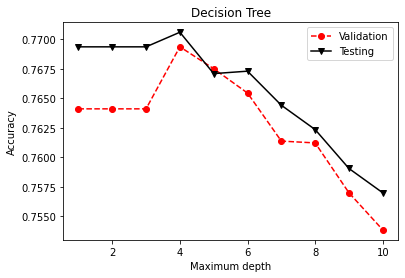

In [47]:
maxdepths = [1,2,3,4,5,6,7,8,9,10]

validationAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

numFolds = 10
index = 0

for depth in maxdepths:
  clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=1)
  scores = cross_val_score(clf, X_train, Y_train, cv=numFolds)
  validationAccuracy[index] = np.mean(scores)

  clf = clf.fit(X_train, Y_train)
  Y_predTest = clf.predict(X_test)
  testAccuracy[index] = accuracy_score(Y_test, Y_predTest)
  index += 1

plt.plot(maxdepths, validationAccuracy, 'ro--', maxdepths, testAccuracy, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree')
plt.legend(['Validation','Testing'])

HyperParam = np.argmax(validationAccuracy)
print('Best Hyperparameter: maxdepth =', maxdepths[HyperParam])
print('Test Accuracy =', testAccuracy[HyperParam])

Best Hyperparameter, C = 0.4
Test Accuracy = 0.7734761120263591


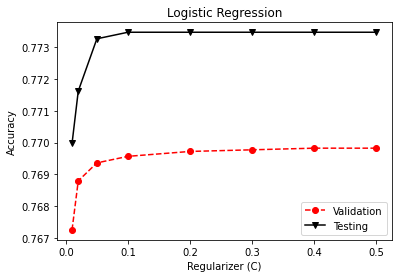

In [48]:
from sklearn import linear_model

regularizers = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
validationAcc = np.zeros(len(regularizers))
testAcc = np.zeros(len(regularizers))
index = 0

for C in regularizers:
  clf = linear_model.LogisticRegression(C=C, solver='liblinear', penalty='l1', random_state=1)
  scores = cross_val_score(clf, X_train, Y_train, cv=10)
  validationAcc[index] = np.mean(scores)
  clf.fit(X_train, Y_train)
  Y_predTest = clf.predict(X_test)
  testAcc[index] = accuracy_score(Y_test, Y_predTest)
  index += 1

plt.plot(regularizers, validationAcc, 'ro--', regularizers, testAcc, 'kv-')
plt.xlabel('Regularizer (C)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression')
plt.legend(['Validation', 'Testing'])

bestHyperparam = np.argmax(validationAcc)
print('Best Hyperparameter, C =', regularizers[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

Best hyperparameter: k = 25
Test Accuracy = 0.7650329489291599


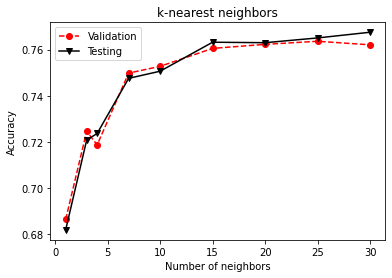

In [49]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

numNeighbors = [1, 3, 4, 7, 10, 15, 20, 25, 30]
validationAcc = np.zeros(len(numNeighbors))
testAcc = np.zeros(len(numNeighbors))
index = 0

for nn in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=nn)
    scores = cross_val_score(clf, X_train, Y_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
plt.plot(numNeighbors, validationAcc, 'ro--', numNeighbors, testAcc, 'kv-')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('k-nearest neighbors')
plt.legend(['Validation','Testing'])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter: k =', numNeighbors[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])